# **DIP Assignment - 1**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import os

import cv2
from skimage.io import imread, imsave
from PIL import Image

## Global config variables

In [2]:
img_base_path = "../images/dip{}.jpg"
saved_img_path = "../images/{}/dip{}_grayscale{}.jpg"

## Util Functions

In [3]:
def read_image_cv2(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def read_image_skimage(path):
    return imread(path)

def read_image_pil(path):
    return np.array(Image.open(path))

In [4]:
def write_image_cv2(image, n, i):
    if not os.path.exists("../images/cv2"):
        os.mkdir("../images/cv2")
    cv2.imwrite(saved_img_path.format("cv2", i, n), image)

def write_image_skimage(image, n, i):
    if not os.path.exists("../images/skimage"):
        os.mkdir("../images/skimage")
    imsave(saved_img_path.format("skimage", i, n), image.astype(np.uint8), check_contrast=False)

def write_image_pil(image, n, i):
    if not os.path.exists("../images/PIL"):
        os.mkdir("../images/PIL")
    img = Image.fromarray(image.astype(np.uint8))
    img.save(saved_img_path.format("PIL", i, n))

In [5]:
def read_images(func):
    images = list()
    for i in range(1,5):
        images.append(func(img_base_path.format(i)))
    return images

def write_images(images, func, n=1):
    for i in range(4):
        func(images[i], n, i+1)

In [6]:
def show_images_2x2(images):
    fig,axs = plt.subplots(2,2)
    for i in range(4):
        axs[(i)//2,(i)%2].imshow(images[i])
    fig.set_size_inches(6.5, 6.5)
    plt.show()

def show_images_4x2(images1, images2, cmap='gray'):
    fig,axs = plt.subplots(4,2)
    for i in range(4):
        axs[i,0].imshow(images1[i], cmap=cmap)
        axs[i,1].imshow(images2[i], cmap=cmap)
    fig.set_size_inches(10.5, 10.5)
    plt.show()

In [7]:
def direct_grayscale1(img):
    return (img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3).astype(int)

def direct_grayscale2(img):
    return (img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114).astype(int)

In [8]:
def convert_grayscale1(images):
    images_grayscale = list()
    for image in images:
        images_grayscale.append(direct_grayscale1(image))
    return images_grayscale

def convert_grayscale2(images):
    images_grayscale = list()
    for image in images:
        images_grayscale.append(direct_grayscale2(image))
    return images_grayscale

## Using opencv

In [9]:
images = read_images(read_image_cv2)

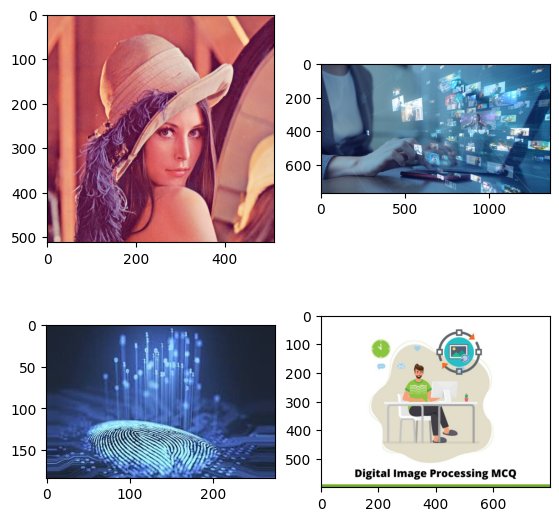

In [10]:
# Show original images
show_images_2x2(images)

In [11]:
# Convert all images to grayscale

images_grayscale1 = convert_grayscale1(images)
images_grayscale2 = convert_grayscale2(images)

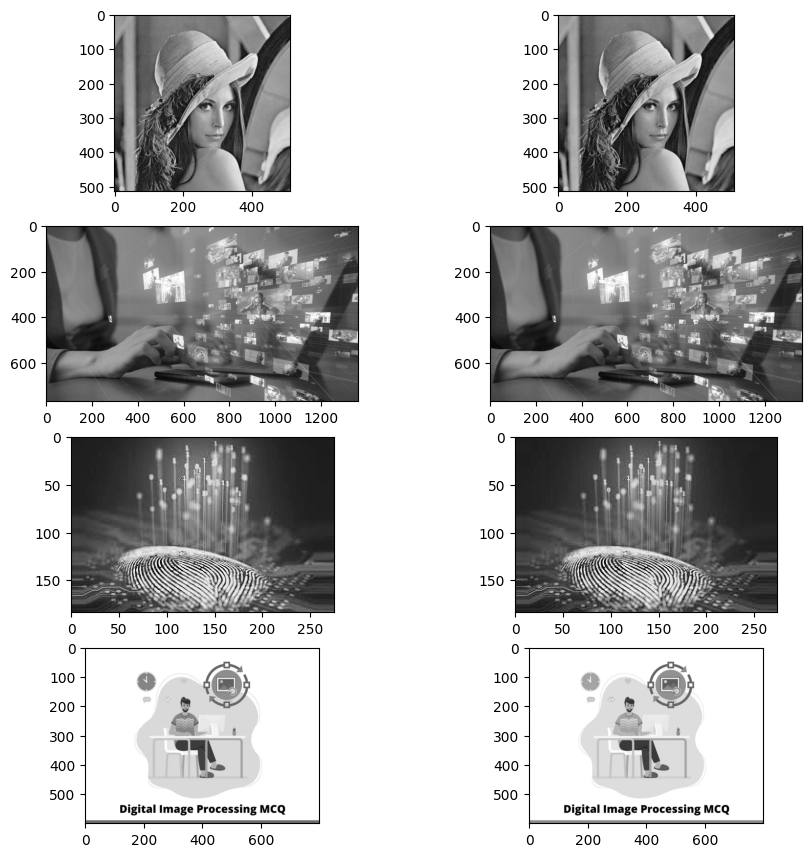

In [12]:
# Show all images, converted to grayscale

show_images_4x2(images_grayscale1, images_grayscale2)

In [13]:
# Save all images

write_images(images_grayscale1, write_image_cv2, n=1)
write_images(images_grayscale2, write_image_cv2, n=2)

## Using skimage

In [14]:
images = read_images(read_image_skimage)

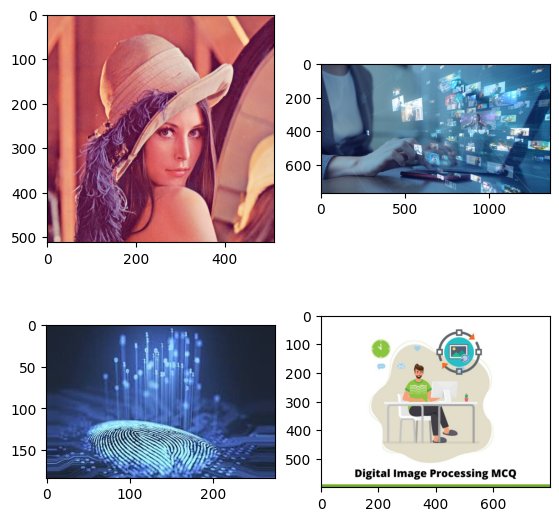

In [15]:
# Show original images
show_images_2x2(images)

In [16]:
# Convert all images to grayscale

images_grayscale1 = convert_grayscale1(images)
images_grayscale2 = convert_grayscale2(images)

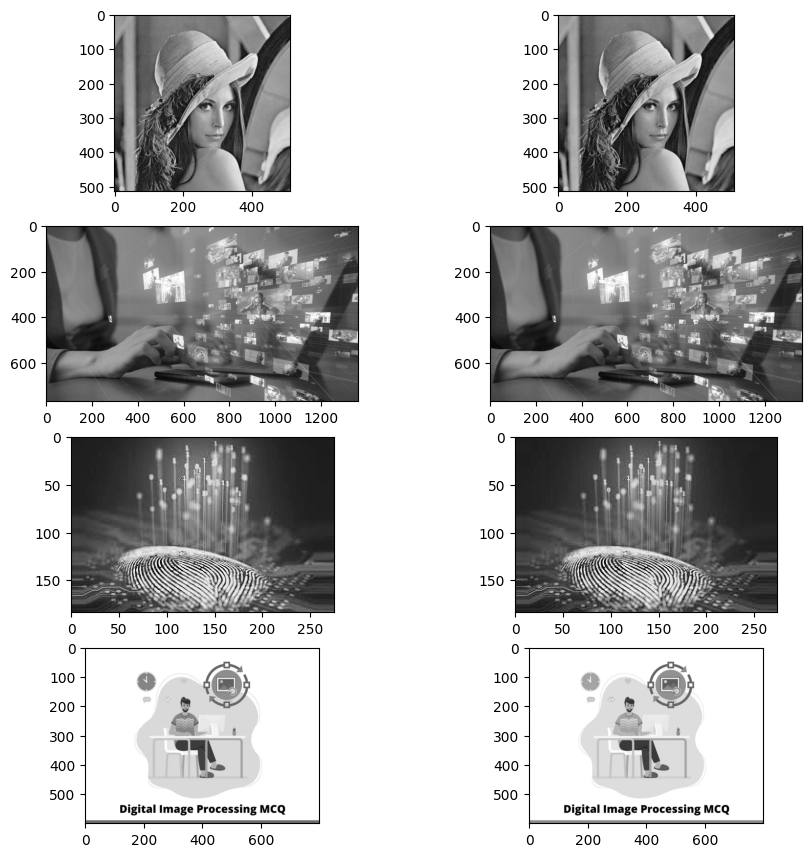

In [17]:
# Show all images, converted to grayscale

show_images_4x2(images_grayscale1, images_grayscale2)

In [18]:
# Save all images

write_images(images_grayscale1, write_image_skimage, n=1)
write_images(images_grayscale2, write_image_skimage, n=2)

## Using PIL

In [19]:
images = read_images(read_image_pil)

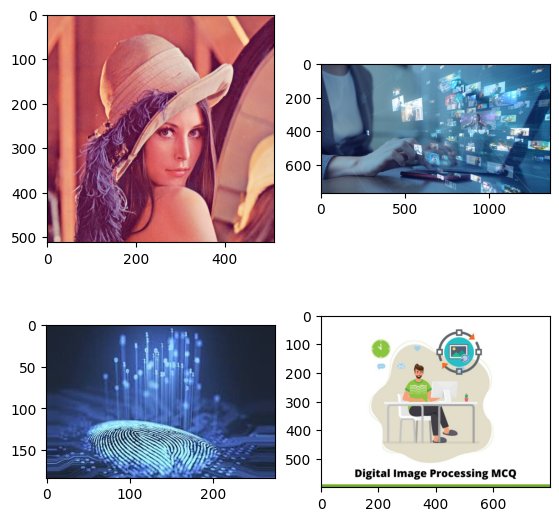

In [20]:
# Show original images
show_images_2x2(images)

In [21]:
# Convert all images to grayscale

images_grayscale1 = convert_grayscale1(images)
images_grayscale2 = convert_grayscale2(images)

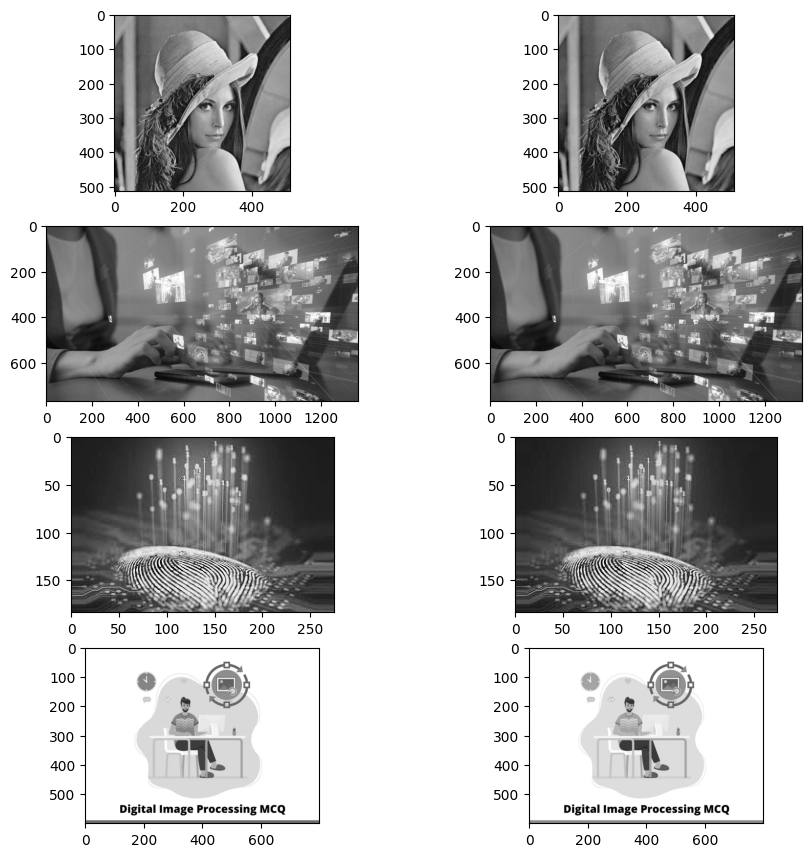

In [22]:
# Show all images, converted to grayscale

show_images_4x2(images_grayscale1, images_grayscale2)

In [23]:
# Save all images

write_images(images_grayscale1, write_image_pil, n=1)
write_images(images_grayscale2, write_image_pil, n=2)

## _Click picture from webcam_

Saved image at ../images/opencv_frame_1691565381.7153924.png


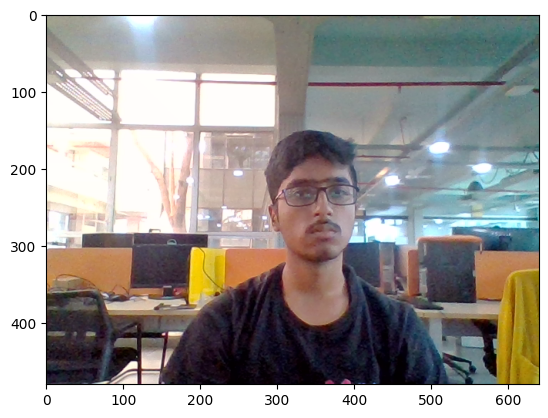

In [24]:
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
if not ret:
    print("failed to grab frame")
else:
    save_path = "../images/opencv_frame_{}.png".format(time.time())
    cv2.imwrite(save_path, frame)
    print("Saved image at {}".format(save_path))

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(image)

cam.release()

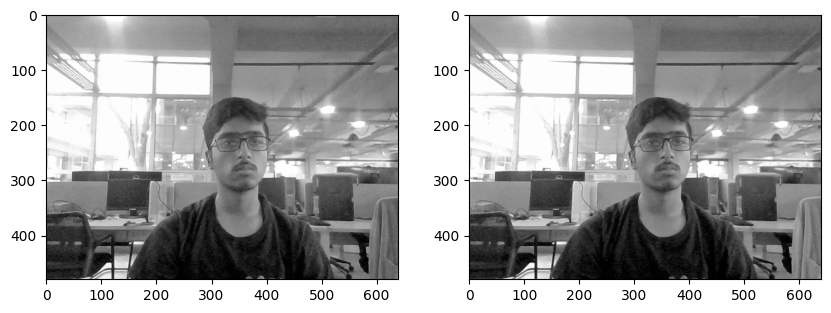

In [25]:
# My image to grayscale

fig, axs = plt.subplots(1, 2)

axs[0].imshow(direct_grayscale1(image), cmap='gray')
axs[1].imshow(direct_grayscale2(image), cmap='gray')

fig.set_figwidth(10)